<a href="https://colab.research.google.com/github/Summer99D/Big_data_final_project/blob/main/MLF_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test_trns_df= pd.read_csv('/content/drive/MyDrive/MLF/test_transaction.csv')
test_id_df= pd.read_csv('/content/drive/MyDrive/MLF/test_identity.csv')
train_trns_df= pd.read_csv('/content/drive/MyDrive/MLF/train_transaction.csv')
train_id_df= pd.read_csv('/content/drive/MyDrive/MLF/train_identity.csv')


In [4]:
print(test_trns_df.describe)

<bound method NDFrame.describe of         TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224          31.950         W  10409  111.0   
1             3663550       18403263          49.000         W   4272  111.0   
2             3663551       18403310         171.000         W   4476  574.0   
3             3663552       18403310         284.950         W  10989  360.0   
4             3663553       18403317          67.950         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279          94.679         C  13832  375.0   
506687        4170236       34214287          12.173         C   3154  408.0   
506688        4170237       34214326          49.000         W  16661  490.0   
506689        4170238       34214337         202.000         W  16621  516.0   
506690        4170239       34214345          24.346         C   5713  168.0   

     

In [5]:
print(test_id_df.describe)

<bound method NDFrame.describe of         TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  \
0             3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN   
1             3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN   
2             3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN   
3             3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN   
4             3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
141902        4170230  -20.0  473365.0    NaN    NaN    0.0    0.0    NaN   
141903        4170233   -5.0  489917.0    0.0    0.0   -4.0  -32.0    NaN   
141904        4170234   -5.0  110081.0    NaN    NaN   22.0  -31.0    NaN   
141905        4170236  -45.0  266704.0    NaN    NaN   -3.0  -10.0    NaN   
141906        4170239  -10.0  692090.0    0.0    0.0    0.0    0.0    NaN   

        id-08  id-09  ...                

In [6]:
print(train_id_df.describe)
print(train_id_df.columns)

<bound method NDFrame.describe of         TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  \
0             2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN   
1             2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN   
2             2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN   
3             2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN   
4             2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0    0.0    0.0    NaN   
144229        3577526   -5.0  172059.0    NaN    NaN    1.0   -5.0    NaN   
144230        3577529  -20.0  632381.0    NaN    NaN   -1.0  -36.0    NaN   
144231        3577531   -5.0   55528.0    0.0    0.0    0.0   -7.0    NaN   
144232        3577534  -45.0  339406.0    NaN    NaN  -10.0 -100.0    NaN   

        id_08  id_09  ...                

In [7]:
print(train_trns_df.describe)
print(train_trns_df.columns)

<bound method NDFrame.describe of         TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ... V330  V331  V

In [8]:
## I will be merging on "transaction id"
train_merged= pd.merge(train_trns_df, train_id_df, on='TransactionID', how='left')
test_merged= pd.merge(test_trns_df, test_id_df, on='TransactionID', how='left')

In [9]:
print(train_merged.shape)## we have 434 variables
print(test_merged.shape)

(590540, 434)
(506691, 433)


### Inspecting NaNs

Training data

In [10]:
# Step 1: Calculate NaN statistics
nan_percentage_train = train_merged.isnull().mean() * 100
nan_percentage_train = nan_percentage_train.sort_values(ascending=False)

# Step 2: Summary statistics
print("NaN Distribution Across Columns:")
print(f"Total rows: {train_merged.shape[0]}")
print(f"Total columns: {train_merged.shape[1]}")
print(f"Columns with >30% missing values: {(nan_percentage_train > 30).sum()}") ##removing columns with more than 30% missing vlaues
print("\nTop 10 columns with highest missing values:")
print(nan_percentage_train.head(10))


NaN Distribution Across Columns:
Total rows: 590540
Total columns: 434
Columns with >30% missing values: 232

Top 10 columns with highest missing values:
id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393
id_26    99.125715
id_27    99.124699
id_23    99.124699
id_22    99.124699
dist2    93.628374
dtype: float64


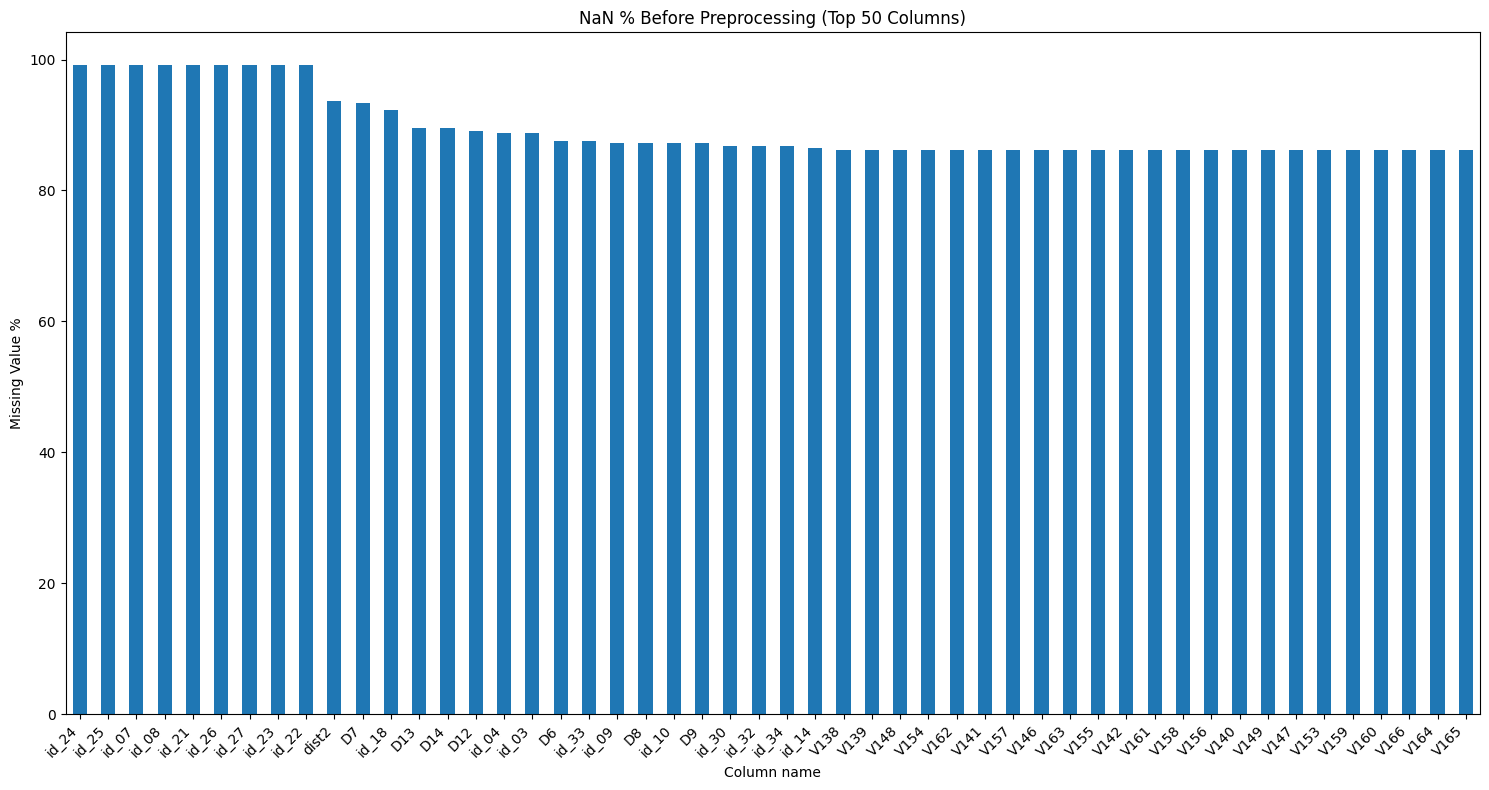

In [11]:
# Plot 1: Bar plot of NaN percentages (top 50 columns)
plt.figure(figsize=(15, 8))
nan_percentage_train.head(50).plot(kind='bar')
plt.title('NaN % Before Preprocessing (Top 50 Columns)')
plt.xlabel('Column name')
plt.ylabel('Missing Value %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/nan_bar_plot_before.png')
plt.show()

In [12]:
print(nan_percentage_train.describe)

<bound method NDFrame.describe of id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
                   ...    
C11               0.000000
C14               0.000000
C13               0.000000
C12               0.000000
TransactionID     0.000000
Length: 434, dtype: float64>


In [13]:
# Remove columns with >30% missing values
columns_to_drop = nan_percentage_train[nan_percentage_train > 30].index
print(f"Removing {len(columns_to_drop)} columns with >30% missing values:")
print(columns_to_drop.tolist())
train_data_cleaned = train_merged.drop(columns=columns_to_drop)

Removing 232 columns with >30% missing values:
['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_27', 'id_23', 'id_22', 'dist2', 'D7', 'id_18', 'D13', 'D14', 'D12', 'id_04', 'id_03', 'D6', 'id_33', 'id_09', 'D8', 'id_10', 'D9', 'id_30', 'id_32', 'id_34', 'id_14', 'V138', 'V139', 'V148', 'V154', 'V162', 'V141', 'V157', 'V146', 'V163', 'V155', 'V142', 'V161', 'V158', 'V156', 'V140', 'V149', 'V147', 'V153', 'V159', 'V160', 'V166', 'V164', 'V165', 'V152', 'V145', 'V143', 'V144', 'V150', 'V151', 'V330', 'V329', 'V336', 'V333', 'V334', 'V331', 'V326', 'V325', 'V324', 'V327', 'V323', 'V322', 'V338', 'V339', 'V335', 'V337', 'V328', 'V332', 'DeviceInfo', 'id_13', 'id_16', 'V249', 'V277', 'V278', 'V248', 'V275', 'V276', 'V252', 'V247', 'V246', 'V232', 'V237', 'V244', 'V243', 'V241', 'V242', 'V240', 'V236', 'V263', 'V262', 'V261', 'V264', 'V267', 'V266', 'V269', 'V265', 'V268', 'V273', 'V274', 'V254', 'V260', 'V253', 'V257', 'V258', 'V218', 'V217', 'V219', 'V223', 'V226', 'V225', 'V224',

In [14]:
## I wanna check data types
train_data_cleaned.dtypes

,0
TransactionID,int64
isFraud,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
...,...
V317,float64
V318,float64
V319,float64
V320,float64


In [15]:
# Impute NaNs in all columns with the mean (for numeric columns only)
train_data_cleaned = train_data_cleaned.fillna(train_data_cleaned.mean(numeric_only=True))

Test Data

In [16]:
# Step 1: Calculate NaN statistics
nan_percentage_test = test_merged.isnull().mean() * 100
nan_percentage_test = nan_percentage_test.sort_values(ascending=False)

# Step 2: Summary statistics
print("NaN Distribution Across Columns:")
print(f"Total rows: {test_merged.shape[0]}")
print(f"Total columns: {test_merged.shape[1]}")
print(f"Columns with >30% missing values: {(nan_percentage_test > 30).sum()}") ##removing columns with more than 30% missing vlaues
print("\nTop 10 columns with highest missing values:")
print(nan_percentage_test.head(10))

NaN Distribution Across Columns:
Total rows: 506691
Total columns: 433
Columns with >30% missing values: 233

Top 10 columns with highest missing values:
id-24    99.064519
id-25    99.005508
id-26    99.003929
id-07    99.001561
id-08    99.001561
id-21    99.001561
id-22    99.000969
id-27    99.000969
id-23    99.000969
dist2    92.809030
dtype: float64


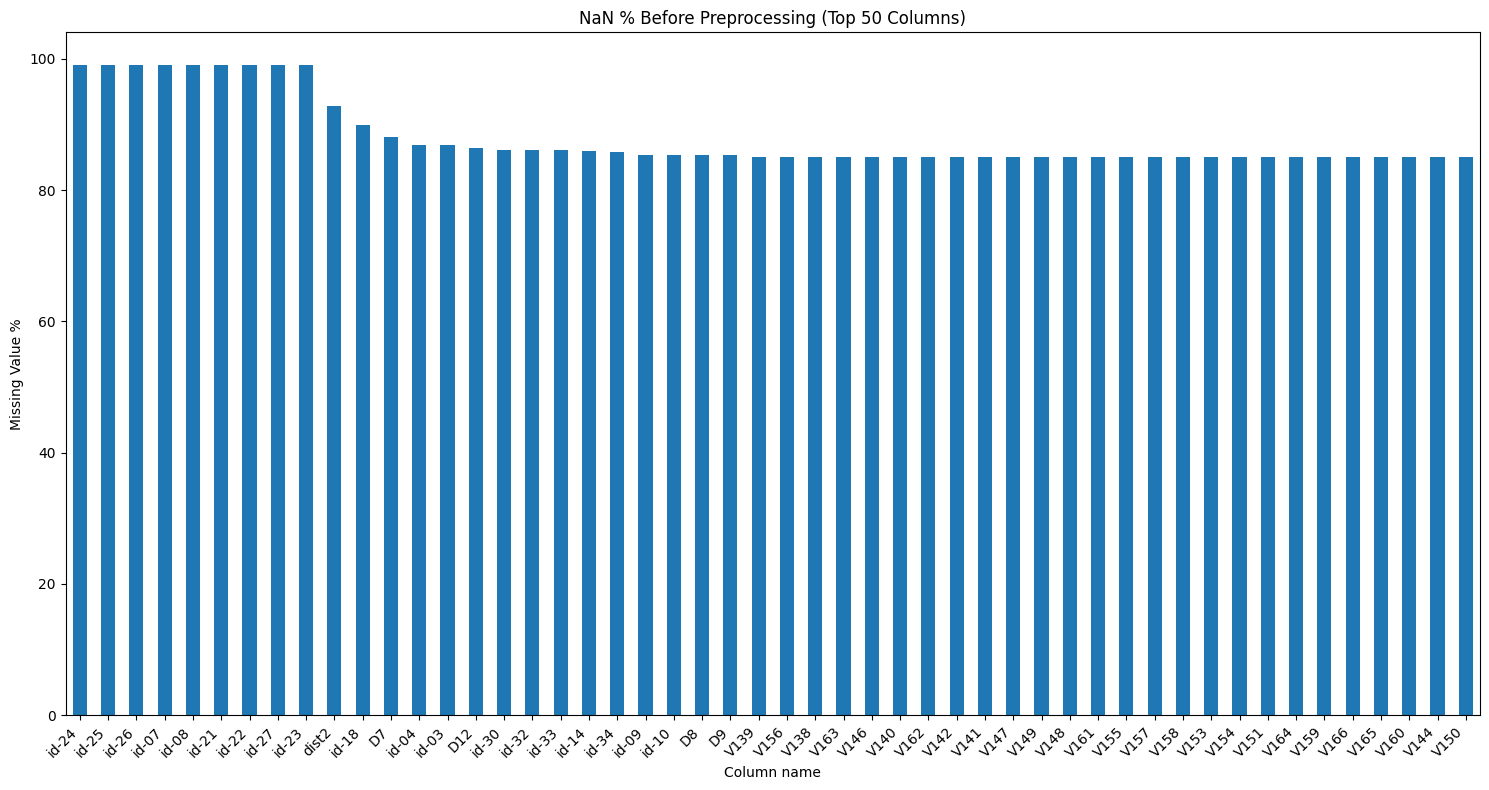

In [17]:
# Bar plot: Top 50 columns
plt.figure(figsize=(15, 8))
nan_percentage_test.head(50).plot(kind='bar')
plt.title('NaN % Before Preprocessing (Top 50 Columns)')
plt.xlabel('Column name')
plt.ylabel('Missing Value %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/nan_bar_plot_before.png')
plt.show()

In [18]:
# Remove columns with >30% missing values
columns_to_drop_test = nan_percentage_test[nan_percentage_test > 30].index
print(f"Removing {len(columns_to_drop_test)} columns with >30% missing values:")
print(columns_to_drop_test.tolist())
test_data_cleaned = test_merged.drop(columns=columns_to_drop_test)

Removing 233 columns with >30% missing values:
['id-24', 'id-25', 'id-26', 'id-07', 'id-08', 'id-21', 'id-22', 'id-27', 'id-23', 'dist2', 'id-18', 'D7', 'id-04', 'id-03', 'D12', 'id-30', 'id-32', 'id-33', 'id-14', 'id-34', 'id-09', 'id-10', 'D8', 'D9', 'V139', 'V156', 'V138', 'V163', 'V146', 'V140', 'V162', 'V142', 'V141', 'V147', 'V149', 'V148', 'V161', 'V155', 'V157', 'V158', 'V153', 'V154', 'V151', 'V164', 'V159', 'V166', 'V165', 'V160', 'V144', 'V150', 'V143', 'V152', 'V145', 'V325', 'V327', 'V326', 'V337', 'V333', 'V332', 'V329', 'V330', 'V331', 'V324', 'V328', 'V322', 'V323', 'V334', 'V335', 'V338', 'V339', 'V336', 'DeviceInfo', 'D14', 'D13', 'D6', 'id-16', 'V249', 'V254', 'V278', 'V252', 'V275', 'V276', 'V277', 'V248', 'V246', 'V247', 'V233', 'V237', 'V235', 'V244', 'V242', 'V243', 'V241', 'V240', 'V217', 'V263', 'V264', 'V265', 'V268', 'V267', 'V266', 'V269', 'V273', 'V274', 'V262', 'V253', 'V261', 'V257', 'V258', 'V260', 'V229', 'V223', 'V218', 'V219', 'V228', 'V226', 'V225', 

In [19]:
# Impute NaNs in all columns with the mean (for numeric columns only)
test_data_cleaned = test_data_cleaned.fillna(test_data_cleaned.mean(numeric_only=True))

## Running PCA

In [20]:
# 1. Separate features and target
X = train_data_cleaned.drop("isFraud", axis=1)
y = train_data_cleaned["isFraud"]

In [21]:
type(X)



pandas.core.frame.DataFrame